**Importing Libraries**

In [308]:
import pandas as pd
import numpy as np
import re
import nltk 

#for plotting
import matplotlib.pyplot as plt

#for ML models
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

#for processing the text
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 

**Loading Dataset**

In [309]:
spam_class_dataset_csv=pd.read_csv("/content/SPAM text message 20170820 - Data.csv")
spam_class_dataset_csv.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Analysing the dataset**

In [310]:
spam_class_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [311]:
spam_class_dataset_csv.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [312]:
spam_class_dataset_csv["Category"].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

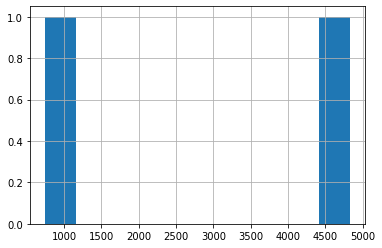

In [313]:
spam_class_dataset_csv["Category"].value_counts().hist()

*Separating labels and the data*

In [314]:
y = spam_class_dataset_csv.Category
X = spam_class_dataset_csv.drop("Category",axis=1)

In [315]:
X

,Message
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will ü b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [316]:
spam_class_dataset_csv.rename(columns = {'Category':'Label'}, inplace=True)

In [317]:
spam_class_dataset_csv.columns

Index(['Label', 'Message'], dtype='object')

In [318]:
spam_class_dataset = spam_class_dataset_csv.replace({'spam':'1','ham':'0'})
spam_class_dataset

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


**Stemming of data**

In [319]:
ps = PorterStemmer() 

def stemming(sentence):
  stem_words = []

  for j in sentence.split():
    stem_words.append(ps.stem(j))
  
  return stem_words

**Pre-Processing of data**

In [320]:
def pre_process(text):
  preprocessed=[]

  for sent in text:
    sent = re.sub(r'[\.•,;:?!@#=+$%^&*_~><\-\(\)\{\}\[\]\"\'\|\/]','',sent)        # to remove special chars from sentence
    sent = re.sub(r'[\d+]','',sent)                # to remove numbers from the sentence
    sent = re.sub('\n',' ',sent)
    sent = sent.lower()               # lowercase
    stemmed = stemming(sent)

    preprocessed.append(sent)
  return preprocessed

In [321]:
clean_text = pre_process(X['Message'])
print(type(clean_text))

<class 'list'>


In [322]:
clean_text

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs',
 'u dun say so early hor u c already then say',
 'nah i dont think he goes to usf he lives around here though',
 'freemsg hey there darling its been  weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send £ to rcv',
 'even my brother is not like to speak with me they treat me like aids patent',
 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press  to copy your friends callertune',
 'winner as a valued network customer you have been selected to receivea £ prize reward to claim call  claim code kl valid  hours only',
 'had your mobile  months or more u r entitled to update to the latest colour mobiles with camera for free ca

**Creating tf-idf Vectors**

*Removing stop words along with tf-idf vectors*

In [343]:
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS
vectorizer = TfidfVectorizer(ngram_range=(1,1),stop_words=stop_words)

feature_matrix = vectorizer.fit_transform(clean_text)

In [344]:
feature_matrix.shape

(5572, 8341)

In [345]:
print(vectorizer.get_feature_names())

['aa', 'aah', 'aaniye', 'aaooooright', 'aathilove', 'aathiwhere', 'ab', 'abbey', 'abdomen', 'abeg', 'abelu', 'aberdeen', 'abi', 'ability', 'abiola', 'abj', 'able', 'abnormally', 'aboutas', 'abroad', 'absence', 'absolutely', 'abstract', 'abt', 'abta', 'aburo', 'abuse', 'abusers', 'ac', 'academic', 'acc', 'accent', 'accenture', 'accept', 'access', 'accessible', 'accidant', 'accident', 'accidentally', 'accommodation', 'accommodationvouchers', 'accomodate', 'accomodations', 'accordin', 'accordingly', 'accordinglyor', 'account', 'accounting', 'accounts', 'accumulation', 'achanammarakheshqatar', 'ache', 'achieve', 'acid', 'acknowledgement', 'aclpm', 'acnt', 'acoentry', 'acsmsrewards', 'act', 'acted', 'actin', 'acting', 'action', 'activ', 'activate', 'active', 'activities', 'actor', 'actual', 'actually', 'acwicmbcktzr', 'ad', 'adam', 'add', 'addamsfa', 'added', 'addicted', 'addie', 'adding', 'address', 'addressull', 'adds', 'adewale', 'adi', 'adjustable', 'admin', 'administrator', 'admirer', 

**Splitting in train and test data**

In [346]:
y = spam_class_dataset['Label'].to_numpy()

In [347]:
y

array(['0', '0', '1', ..., '0', '0', '0'], dtype=object)

In [348]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, y, test_size=0.20) # , random_state=42)        # 80:20 ratio

### **MODEL 1: Multinomial Naive Bayes**

*Training the Model*

In [350]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)              #training the NB model using the TF-IDF matrix and the labels of training data

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

*Predicting the results*

In [351]:
#predicting the results of the test data
y_pred = clf_nb.predict(X_test)

*Accuracy of the prediction*

In [352]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9614349775784753


In [353]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[958,   0],
       [ 43, 114]])

###**MODEL 2: SVM**

*Training the Model*

In [354]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state = 11)
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=11, shrinking=True, tol=0.001,
    verbose=False)

In [355]:
y_pred = svm.predict(X_test)

*Accuracy of prediction*

In [356]:
print(accuracy_score(y_test, y_pred))

0.9838565022421525


In [357]:
confusion_matrix(y_test, y_pred)

array([[957,   1],
       [ 17, 140]])

###**MODEL 3: Logistic Regression**

*Training the Model*

In [358]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', penalty='l1')
lr.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [359]:
y_pred=lr.predict(X_test)

*Accuracy of prediction*

In [360]:
print(accuracy_score(y_test, y_pred))

0.9587443946188341


In [361]:
confusion_matrix(y_test, y_pred)

array([[954,   4],
       [ 42, 115]])